# Tutorial - Marques-Pita Canalization

The example from the Marques-Pita & Rocha (2013) paper.

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
from cana.datasets.bio import MARQUESPITA
from cana.drawing.canalizing_map import draw_canalizing_map_graphviz
from IPython.display import Image, display

pd.set_option('display.width',200)


In [3]:
Image(url="http://journals.plos.org/plosone/article/figure/image?size=large&id=info:doi/10.1371/journal.pone.0055946.g005",width=350)

## Marques-Pita Network

In [4]:
net = MARQUESPITA()
print(net)

<BNetwork(name='Marques-Pita & Rocha', N=7, Nodes=['One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven'])>


In [5]:
n = MARQUESPITA().nodes[6]
print(n)
print(n.outputs)
print('k_r: {:.2f}'.format(n.input_redundancy()))
print('k_e: {:.2f}'.format(n.effective_connectivity()))
#print('k_s: {:.2f} - {:.2f}'.format(n.input_symmetry(mode='node',bound='upper',norm=False), n.input_symmetry(mode='node',bound='lower',norm=False)))
print('r_ji: {:} (mean)'.format(n.edge_redundancy(bound='mean')))
print('e_ji: {:} (mean)'.format(n.edge_effectiveness(bound='mean')))

<BNode(id=6, name='Seven', k=6, inputs=[0,1,2,3,4,5], state='0', outputs=[0,0,0,0...0,0,0,0] constant=False)>
['0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
k_r: 0.69
k_e: 0.31
r_ji: [0.8177083333333334, 0.4270833333333333, 0.4270833333333333, 0.8177083333333334, 0.8177083333333334, 0.8177083333333334] (mean)
e_ji: [0.18229166666666663, 0.5729166666666667, 0.5729166666666667, 0.18229166666666663, 0.18229166666666663, 0.18229166666666663] (mean)


In [6]:
print('Original LUT')
dfLUT = n.look_up_table()
display(dfLUT)

Original LUT


,In:,Out:
0,000000,0
1,000001,0
2,000010,0
3,000011,0
4,000100,0
...,...,...
59,111011,0
60,111100,0
61,111101,0
62,111110,0


In [7]:
print('PI Schema')
dfPI = n.schemata_look_up_table(type='pi')
display(dfPI)

PI Schema


,Input,Output
0,1##111,0
1,##0###,0
2,#1####,0
3,0##000,0
4,101#0#,1
5,#011#0,1
6,001##1,1
7,#0101#,1
8,0011##,1
9,#01#10,1


In [8]:
print('TW Schema')
dfTW = n.schemata_look_up_table(type='ts')
display(dfTW)

TW Schema


IndexError: list index out of range

In [ ]:
print("Values in this Panel C are not k normalized")
Image(url="http://journals.plos.org/plosone/article/figure/image?size=large&id=10.1371/journal.pone.0055946.g010",width=350)

Values in this Panel C are not k normalized


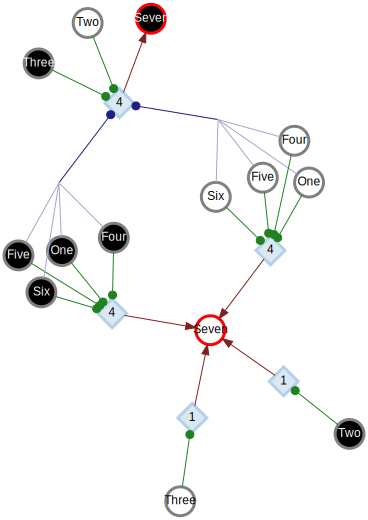

In [ ]:
draw_canalizing_map_graphviz(n.canalizing_map())